# Key Levels Detection

In [2]:
import pandas as pd
df = pd.read_csv("EURUSD_Candlestick_1_Hour_BID_04.05.2003-15.04.2023.csv")
df.columns=['time', 'open', 'high', 'low', 'close', 'volume']
#Check if NA values are in data
df=df[df['volume']!=0]
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.head(10)

,time,open,high,low,close,volume
0,04.05.2003 21:00:00.000,1.12284,1.12338,1.12242,1.12305,2.905910e+07
1,04.05.2003 22:00:00.000,1.12274,1.12302,1.12226,1.12241,2.609180e+07
2,04.05.2003 23:00:00.000,1.12235,1.12235,1.12160,1.12169,2.924090e+07
3,05.05.2003 00:00:00.000,1.12161,1.12314,1.12154,1.12258,2.991480e+07
4,05.05.2003 01:00:00.000,1.12232,1.12262,1.12099,1.12140,2.837070e+07
5,05.05.2003 02:00:00.000,1.12141,1.12211,1.12085,1.12152,2.986770e+07
6,05.05.2003 03:00:00.000,1.12123,1.12179,1.12049,1.12162,2.725680e+07
7,05.05.2003 04:00:00.000,1.12098,1.12176,1.12079,1.12122,2.827890e+07
8,05.05.2003 05:00:00.000,1.12129,1.12222,1.12091,1.12143,2.676490e+07
9,05.05.2003 06:00:00.000,1.12128,1.12241,1.12066,1.12088,2.995660e+07


In [3]:
def pivotid(df1, l, n1, n2): #n1 n2 before and after candle l
    if l-n1 < 0 or l+n2 >= len(df1):
        return 0
    
    pividlow=1
    pividhigh=1
    for i in range(l-n1, l+n2+1):
        if(df1.low[l]>df1.low[i]):
            pividlow=0
        if(df1.high[l]<df1.high[i]):
            pividhigh=0
    if pividlow and pividhigh:
        return 3
    elif pividlow:
        return 1
    elif pividhigh:
        return 2
    else:
        return 0
    
df['pivot'] = df.apply(lambda x: pivotid(df, x.name,10,10), axis=1)

## Pivot Candles Vizualisation

In [4]:
df

,time,open,high,low,close,volume,pivot
0,04.05.2003 21:00:00.000,1.12284,1.12338,1.12242,1.12305,2.905910e+07,0
1,04.05.2003 22:00:00.000,1.12274,1.12302,1.12226,1.12241,2.609180e+07,0
2,04.05.2003 23:00:00.000,1.12235,1.12235,1.12160,1.12169,2.924090e+07,0
3,05.05.2003 00:00:00.000,1.12161,1.12314,1.12154,1.12258,2.991480e+07,0
4,05.05.2003 01:00:00.000,1.12232,1.12262,1.12099,1.12140,2.837070e+07,0
...,...,...,...,...,...,...,...
123836,14.04.2023 16:00:00.000,1.09789,1.09851,1.09722,1.09775,1.429995e+07,0
123837,14.04.2023 17:00:00.000,1.09775,1.09901,1.09752,1.09871,9.740260e+06,0
123838,14.04.2023 18:00:00.000,1.09871,1.09989,1.09871,1.09988,9.199190e+06,0
123839,14.04.2023 19:00:00.000,1.09987,1.09992,1.09921,1.09964,4.669030e+06,0


In [5]:
import numpy as np
def pointpos(x):
    if x['pivot']==1:
        return x['low']-1e-3
    elif x['pivot']==2:
        return x['high']+1e-3
    else:
        return np.nan

df['pointpos'] = df.apply(lambda row: pointpos(row), axis=1)

In [6]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
dfpl = df[-300:-1]
fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['open'],
                high=dfpl['high'],
                low=dfpl['low'],
                close=dfpl['close'],
                increasing_line_color= 'green', 
                decreasing_line_color= 'red')])

fig.add_scatter(x=dfpl.index, y=dfpl['pointpos'], mode="markers",
                marker=dict(size=5, color="MediumPurple"),
                name="pivot")
fig.update_layout(xaxis_rangeslider_visible=False)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(paper_bgcolor='black', plot_bgcolor='black')

fig.show()

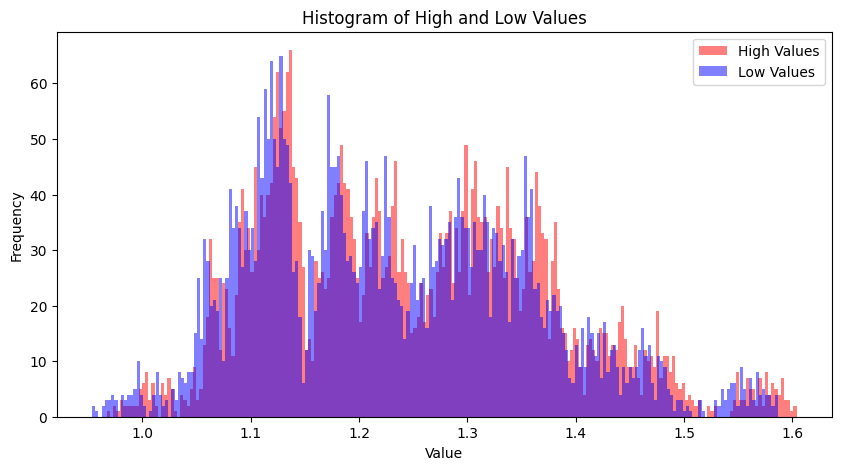

In [7]:
import matplotlib.pyplot as plt

dfkeys = df[:]

# Filter the dataframe based on the pivot column
high_values = dfkeys[dfkeys['pivot'] == 2]['high']
low_values = dfkeys[dfkeys['pivot'] == 1]['low']

# Define the bin width
bin_width = 0.003  # Change this value as needed

# Calculate the number of bins
bins = int((high_values.max() - low_values.min()) / bin_width)

# Create the histograms
plt.figure(figsize=(10, 5))
plt.hist(high_values, bins=bins, alpha=0.5, label='High Values', color='red')
plt.hist(low_values, bins=bins, alpha=0.5, label='Low Values', color='blue')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of High and Low Values')
plt.legend()